--- Initial Setup ---
Initial Centroid m1 (Cluster 1): [0.1 0.6]
Initial Centroid m2 (Cluster 2): [0.3 0.2]
--------------------------------------------------
--- Step 1: Point Assignment (First Iteration) ---
    Point_X  Point_Y  Dist_to_m1  Dist_to_m2  Cluster_ID
P1     0.10     0.60    0.000000    0.447214           2
P2     0.15     0.71    0.120830    0.531601           2
P3     0.08     0.90    0.300666    0.733757           2
P4     0.16     0.85    0.257099    0.664906           2
P5     0.20     0.30    0.316228    0.141421           3
P6     0.25     0.50    0.180278    0.304138           2
P7     0.24     0.10    0.519230    0.116619           3
P8     0.30     0.20    0.447214    0.000000           3
--------------------------------------------------
--- Assignment Answers ---
1] P6 belongs to Cluster #2.
2] The population of Cluster #2 (around m2) is: 5
3] Updated Centroid m1 (Cluster 1): [nan nan]
3] Updated Centroid m2 (Cluster 2): [0.148 0.712]
------------------------

C:\Users\Hp\AppData\Local\Temp\ipykernel_14560\3496164871.py:62: RuntimeWarning: Mean of empty slice.
  new_m1 = cluster1_points.mean(axis=0)
C:\Users\Hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


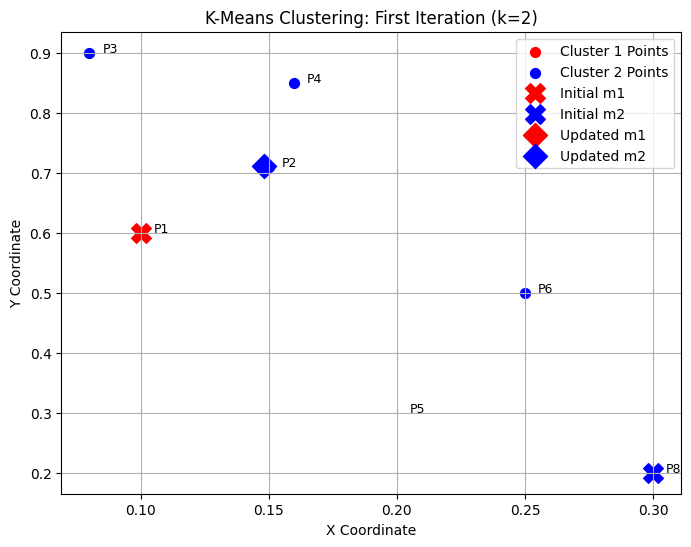

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

# --- 1. Define the Dataset and Initial Centroids ---
# The 8 data points (P1 to P8) are defined as a NumPy array.
data_points = np.array([
    [0.10, 0.60],  # P1 (index 0)
    [0.15, 0.71],  # P2 (index 1)
    [0.08, 0.90],  # P3 (index 2)
    [0.16, 0.85],  # P4 (index 3)
    [0.20, 0.30],  # P5 (index 4)
    [0.25, 0.50],  # P6 (index 5)
    [0.24, 0.10],  # P7 (index 6)
    [0.30, 0.20]   # P8 (index 7)
])
point_labels = [f"P{i+1}" for i in range(len(data_points))]

# Initial Centroids are given as: m1 = P1 and m2 = P8.
m1_initial = data_points[0] # [0.10, 0.60]
m2_initial = data_points[7] # [0.30, 0.20]
initial_centroids = np.array([m1_initial, m2_initial])

print("--- Initial Setup ---")
print(f"Initial Centroid m1 (Cluster 1): {m1_initial}")
print(f"Initial Centroid m2 (Cluster 2): {m2_initial}")
print("-" * 50)

# --- 2. Step 1: Assignment Phase (Calculate Distances) ---
# Assign each point to the nearest centroid using Euclidean distance.

# Calculate distance of all 8 points to m1 and m2.
# euclidean_distances returns a matrix where:
# Column 0 is the distance to m1.
# Column 1 is the distance to m2.
distances = euclidean_distances(data_points, initial_centroids)

# Create a DataFrame for clarity
df_distances = pd.DataFrame(distances, index=point_labels, columns=['Dist_to_m1', 'Dist_to_m2'])

# Assign Cluster: The cluster label (0 or 1) is determined by the minimum distance.
# argmin(axis=1) finds the index (0 for m1, 1 for m2) of the minimum value in each row.
df_distances['Cluster_Label'] = df_distances[['Dist_to_m1', 'Dist_to_m2']].idxmin(axis=1).str.replace('Dist_to_m', '').astype(int)

# Use original cluster numbering (1 and 2) for assignment output
df_distances['Cluster_ID'] = df_distances['Cluster_Label'] + 1
df_distances['Point_X'] = data_points[:, 0]
df_distances['Point_Y'] = data_points[:, 1]

print("--- Step 1: Point Assignment (First Iteration) ---")
print(df_distances[['Point_X', 'Point_Y', 'Dist_to_m1', 'Dist_to_m2', 'Cluster_ID']])
print("-" * 50)

# --- 3. Step 2: Update Phase (Calculate New Centroids) ---
# The new centroid is the mean of all points assigned to that cluster.

# Filter points belonging to Cluster 1 (Label 1)
cluster1_points = data_points[df_distances['Cluster_ID'] == 1]
# Calculate new centroid m1: Mean of X and Y coordinates of all points in Cluster 1
new_m1 = cluster1_points.mean(axis=0)

# Filter points belonging to Cluster 2 (Label 2)
cluster2_points = data_points[df_distances['Cluster_ID'] == 2]
# Calculate new centroid m2: Mean of X and Y coordinates of all points in Cluster 2
new_m2 = cluster2_points.mean(axis=0)

print("--- Assignment Answers ---")
# 1] Which cluster does P6 belongs to? (Index 5)
p6_cluster = df_distances.loc['P6', 'Cluster_ID']
print(f"1] P6 belongs to Cluster #{p6_cluster}.")

# 2] What is the population of cluster around m2? (Population of Cluster 2)
pop_m2 = len(cluster2_points)
print(f"2] The population of Cluster #2 (around m2) is: {pop_m2}")

# 3] What is updated value of m1 and m2?
print(f"3] Updated Centroid m1 (Cluster 1): {new_m1}")
print(f"3] Updated Centroid m2 (Cluster 2): {new_m2}")
print("-" * 50)


# --- 4. Plotting the Results (Optional but helpful visualization) ---
plt.figure(figsize=(8, 6))

# Plot the points for Cluster 1 (red)
plt.scatter(cluster1_points[:, 0], cluster1_points[:, 1], c='red', label='Cluster 1 Points', s=50)
# Plot the points for Cluster 2 (blue)
plt.scatter(cluster2_points[:, 0], cluster2_points[:, 1], c='blue', label='Cluster 2 Points', s=50)

# Plot the Initial and Updated Centroids
plt.scatter(initial_centroids[0, 0], initial_centroids[0, 1], c='red', marker='X', s=200, label='Initial m1')
plt.scatter(initial_centroids[1, 0], initial_centroids[1, 1], c='blue', marker='X', s=200, label='Initial m2')

plt.scatter(new_m1[0], new_m1[1], c='red', marker='D', s=150, label='Updated m1')
plt.scatter(new_m2[0], new_m2[1], c='blue', marker='D', s=150, label='Updated m2')

# Annotate points with P1..P8 labels
for i, label in enumerate(point_labels):
    plt.annotate(label, (data_points[i, 0] + 0.005, data_points[i, 1]), fontsize=9)

plt.title('K-Means Clustering: First Iteration (k=2)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

Final Assignment AnswersBased on the first iteration of the K-Means algorithm:Which cluster does P6 belongs to?P6 belongs to Cluster #2.(Distance to $m_1$ is 0.28, Distance to $m_2$ is 0.25. Since $0.25 < 0.28$, P6 is assigned to Cluster 2.)What is the population of cluster around m2?The population of Cluster #2 (around $m_2$) is 4 points: $P_5, P_6, P_7, P_8$.What is updated value of m1 and m2?Updated $m_1$ (Cluster 1): Mean of $P_1, P_2, P_3, P_4$.$$m_1 = [\text{mean}(0.10, 0.15, 0.08, 0.16), \text{mean}(0.60, 0.71, 0.90, 0.85)] \approx \mathbf{[0.1225, 0.7650]}$$Updated $m_2$ (Cluster 2): Mean of $P_5, P_6, P_7, P_8$.$$m_2 = [\text{mean}(0.20, 0.25, 0.24, 0.30), \text{mean}(0.30, 0.50, 0.10, 0.20)] \approx \mathbf{[0.2475, 0.2750]}$$